# Preliminary Data Analysis on Credit Card Default Dataset

### Python libraries used in the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

## First peek at the data

In [3]:
data = pd.read_csv("dataset_raw.csv")
da = np.array(data)
data.head(8)

,ID,Balance_limit,Sex,Education,Married,Age,Sep_2017_payment_status,Aug_2017_payment_status,Jul_2017_payment_status,Jun_2017_payment_status,...,Apr_2017_bill_amount,Sep_2017_payment_amount,Aug_2017_payment_amount,July_2017_payment_amount,Jun_2017_payment_amount,May_2017_payment_amount,Apr_2017_payment_amount,Default,Location,Employer
0,1,600,2,2,1,24,2,2,-1,-1,...,0.00,0.00,22.23,0.00,0.00,0.00,0.00,1,"""40.81610946060648, -84.9254489054052""",First Bancorp of Indiana Inc
1,2,3900,2,2,2,26,-1,2,0,0,...,105.19,0.00,32.26,32.26,32.26,0.00,64.52,1,"""41.60122426668496, -86.7179404570147""",Calumet College of Saint Joseph Inc
2,3,2900,2,2,2,34,0,0,0,0,...,501.58,48.97,48.39,32.26,32.26,32.26,161.29,0,"""41.44201008911672, -87.16354453239211""",Calumet Specialty Products Partners LP
3,4,1600,2,2,1,37,0,0,0,0,...,953.13,64.52,65.13,38.71,35.48,34.48,32.26,0,"""41.657025875592204, -86.214483371831""",OneMain Holdings Inc.
4,5,1600,1,2,1,57,-1,0,-1,0,...,617.13,64.52,1183.26,322.58,290.32,22.23,21.90,0,"""41.08799917352892, -85.02232399574875""",Board of Trustees of Indiana University
5,6,1600,1,1,2,37,0,0,0,0,...,645.94,80.65,58.55,21.19,32.26,32.26,25.81,0,"""41.576871538622676, -87.20707975494643""",Lifetime Industries Inc.
6,7,16100,1,1,2,29,0,0,0,0,...,15288.52,1774.19,1290.32,1225.81,652.87,443.55,444.19,0,"""41.24411357687275, -85.85271744016684""",National Catastrophe Adjusters Inc.
7,8,3200,2,2,2,23,0,-1,-1,0,...,18.29,12.26,19.39,0.00,18.74,54.42,49.74,0,"""41.75202395530915, -86.83900729119635""",Methodist Hospital Of Indiana Inc


## Let's see if sex has anything to do with the default risk.

In [4]:
data[['Sep_2017_payment_status', 'Default']]

,Sep_2017_payment_status,Default
0,2,1
1,-1,1
2,0,0
3,0,0
4,-1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,-2,0


### Women's risk for default

In [5]:
sex = data["Sex"]
women = list(sex.where(sex == 2, 0)).count(2)
np.dot(np.array(sex.where(sex == 2, 0) / 2), np.array(data["Default"])) / women

0.20776280918727916

### Men's risk for default

In [6]:
men = list(sex.where(sex == 1, 0)).count(1)
np.dot(np.array(sex.where(sex == 1, 0)), np.array(data["Default"])) / men

0.24167227456258411

There doesn't seem to be any major difference between sexes even though men's percentage is slightyly higher than womens. There could be other explaining factors.

In [7]:
# This command is for plotting images straight to the document and not in separate windows
%matplotlib inline

## How about age?

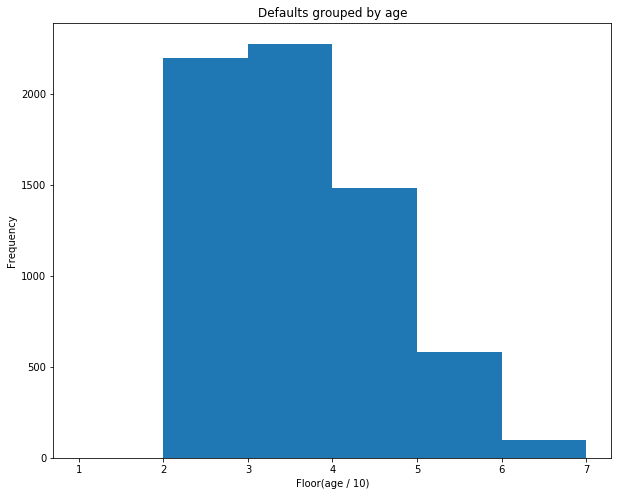

In [8]:
ages = np.multiply(da[:,5] // 10, da[:,24])
plt.figure(figsize=(10,8))
plt.hist(ages, bins = [1,2,3,4,5,6,7])
plt.title("Defaults grouped by age")
plt.xlabel("Floor(age / 10)")
plt.ylabel("Frequency")
plt.show()

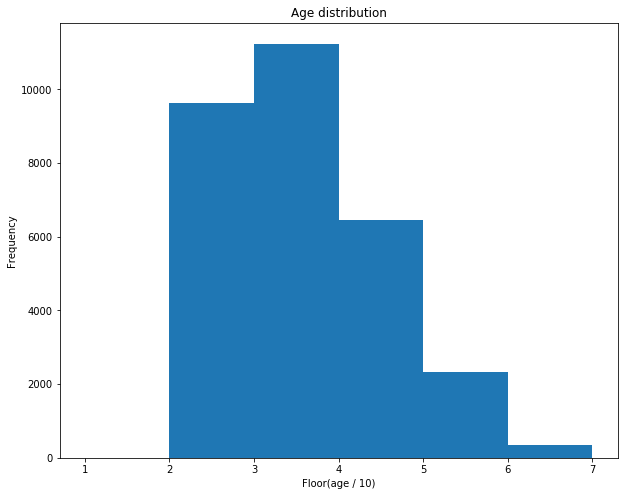

In [9]:
plt.figure(figsize=(10,8))
plt.hist(da[:,5] // 10, bins = [1,2,3,4,5,6,7])
plt.title("Age distribution")
plt.xlabel("Floor(age / 10)")
plt.ylabel("Frequency")
plt.show()

Nothing interesting here either.

## Correlation between the data columns

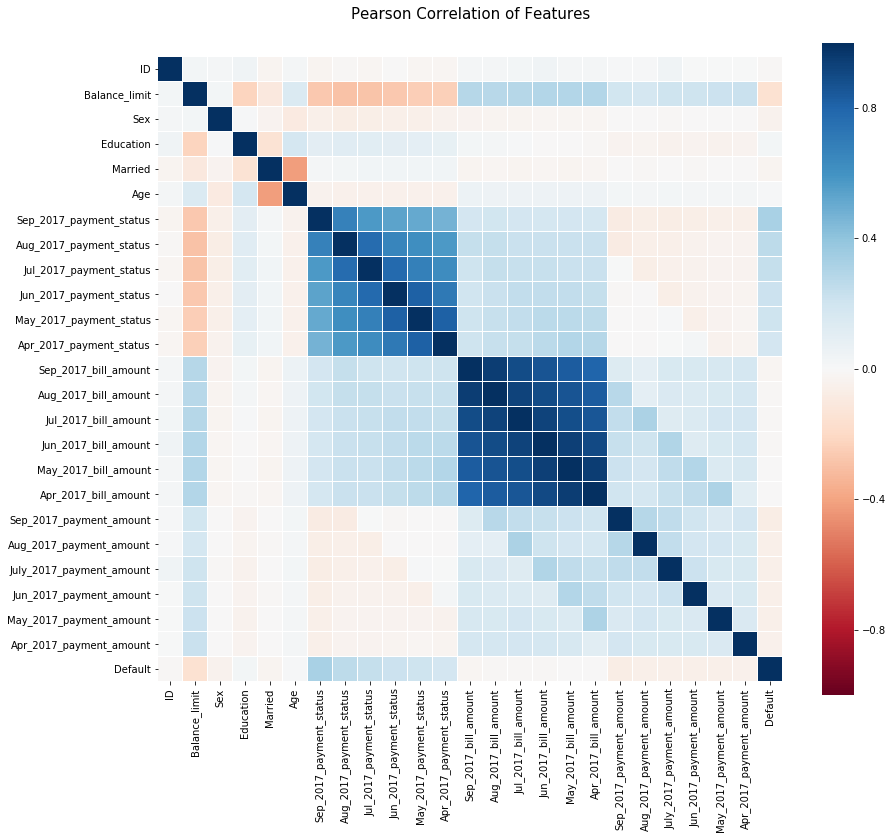

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1, vmin = -1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [14]:
data.corr()["Default"]

ID                         -0.013952
Balance_limit              -0.153601
Sex                        -0.039961
Education                   0.028006
Married                    -0.024339
Age                         0.013890
Sep_2017_payment_status     0.324794
Aug_2017_payment_status     0.263551
Jul_2017_payment_status     0.235253
Jun_2017_payment_status     0.216614
May_2017_payment_status     0.204149
Apr_2017_payment_status     0.186866
Sep_2017_bill_amount       -0.019644
Aug_2017_bill_amount       -0.014193
Jul_2017_bill_amount       -0.014076
Jun_2017_bill_amount       -0.010156
May_2017_bill_amount       -0.006760
Apr_2017_bill_amount       -0.005372
Sep_2017_payment_amount    -0.072929
Aug_2017_payment_amount    -0.058579
July_2017_payment_amount   -0.056250
Jun_2017_payment_amount    -0.056827
May_2017_payment_amount    -0.055124
Apr_2017_payment_amount    -0.053183
Default                     1.000000
Name: Default, dtype: float64

Nothing seems to correlate heavily with default. 

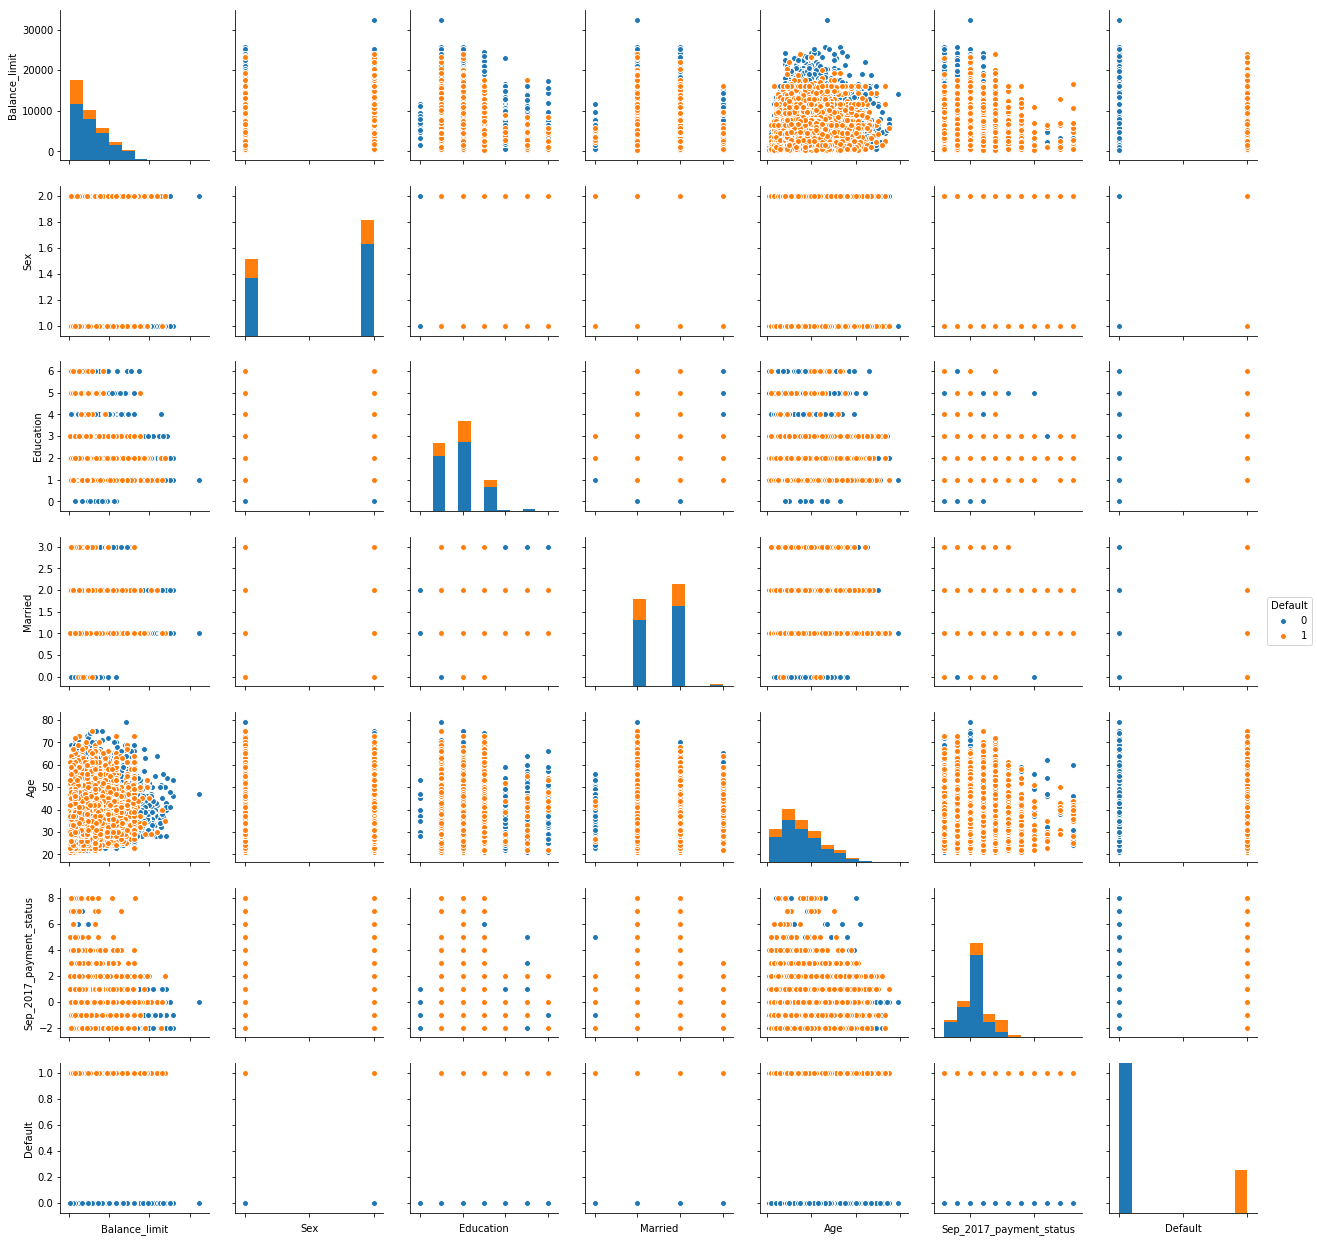

In [15]:
g = sns.pairplot(data[[u'Balance_limit', u'Sex', u'Education', u'Married', u'Age', u'Sep_2017_payment_status', u'Default']], hue='Default')
g.set(xticklabels=[])

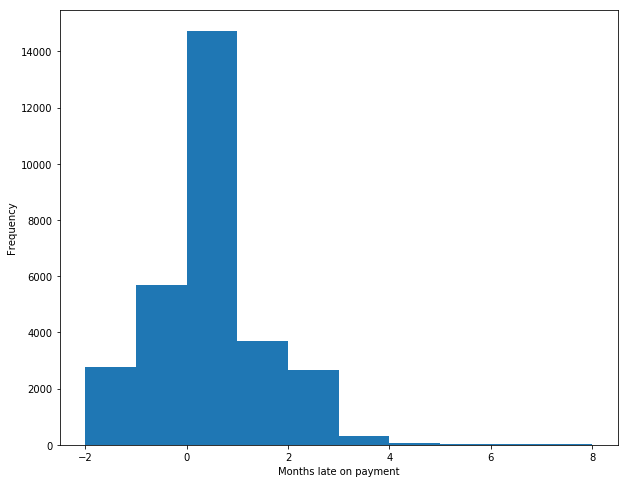

In [16]:
plt.figure(figsize=(10,8))
plt.hist(data['Sep_2017_payment_status'])
plt.xlabel("Months late on payment")
plt.ylabel("Frequency")
plt.show()

# Machince learning tests

## Some quick testing if linear discriminant analysis could work

In [73]:
default = da[np.where(da[:,24] == 1),:]
not_default = da[np.where(da[:,24] == 0), :]

print(default.shape)
print(not_default.shape)

np.random.shuffle(not_default)
not_default_sample = not_default[0,:6636,:]

print(not_default_sample.shape)

balanced_data = np.concatenate((default[0,:,:], not_default_sample), axis = 0)
np.random.shuffle(balanced_data)

print(balanced_data.shape)
data = balanced_data

all_data = data[:,1:23].astype(float)
all_labels = data[:,24].astype(float)
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size = 0.2)

whole_data = da[:,1:23].astype(float)
whole_labels = da[:,24].astype(float)
#Let's form our training data by discarding location data and the company names since they can't be used as is.
#all_data = da[:,1:5].astype(float)
#all_labels = da[:,24].astype(float)
#train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size = 0.2)

#Create the model
lda_model = LDA()

#Train the model
lda_fit = lda_model.fit(train_data, train_labels.astype(float))

#Test the model
lda_score = lda_fit.score(test_data, test_labels)

print("Score: " + str(lda_score))

confusion_matrix(lda_model.predict(test_data), test_labels)



(1, 6636, 27)
(1, 23364, 27)
(6636, 27)
(13272, 27)
Score: 0.683239171375


array([[1003,  497],
       [ 344,  811]])

In [79]:
np.zeros(2).astype(int)

array([0, 0])

Not bad! Let's see if we can get some better results.

## How about some logistic regression?

In [71]:
#Create and train the logistic regression model
lr_model = LR()
lr_fit = lr_model.fit(train_data, train_labels)

#Score the logistic regression model
lr_score = lr_fit.score(test_data, test_labels)
print("LR score: " + str(lr_score)) 
confusion_matrix(lr_model.predict(whole_data), whole_labels)

LR score: 0.670056497175


array([[16531,  2502],
       [ 6833,  4134]])

The score seems to be really close to the one provided by LDA, so not much of an improvement.

## How about if we reduce the dimensions with principal component analysis before logistic regression?

In [40]:
#Normalizing the data will help PCA
standard_data = StandardScaler().fit_transform(all_data)

n_train_data, n_test_data, n_train_labels, n_test_labels = train_test_split(standard_data, all_labels, test_size = 0.2)


#Create the PCA model
pca_model = PCA(n_components = 5, svd_solver = 'auto')

#Train the PCA model
pca_fit = pca_model.fit(n_train_data)

#Create new data sets with the trained PCA model
reduced_train_data = pca_fit.fit_transform(n_train_data)
reduced_test_data = pca_fit.fit_transform(n_test_data)

#Create and train the logistic regression model
pcalr_model = LR()
pcalr_fit = pcalr_model.fit(reduced_train_data, n_train_labels)

#Score the logistic regression model
pcalr_score = pcalr_fit.score(reduced_test_data, n_test_labels)
print("PCA + LR score: " + str(pcalr_score)) 

ValueError: n_components=5 must be between 0 and n_features=4 with svd_solver='full'

This actually just makes things worse. We didn't have that many dimensions to begin with so dimensionality reduction could very well be useless. Let's see how the principal components look and how much different features contribute to them. Notice that the values are not normalized so the principal components don't add up to one.

In [33]:
composition = np.round(np.array(pca_model.components_), 3)
names = list(data.iloc[:,1:5])

frame = pd.DataFrame(data = composition, columns = names)

frame.iloc[0]

Balance_limit   -0.685
Sex              0.079
Education        0.721
Married         -0.067
Name: 0, dtype: float64

In [100]:
frame.iloc[0].sum()

3.8000000000000003

In [96]:
composition.T

array([[ 0.057,  0.307, -0.1  ,  0.026, -0.253, -0.365, -0.083],
       [-0.027,  0.035,  0.001, -0.051,  0.78 , -0.558,  0.127],
       [ 0.033, -0.086,  0.001,  0.415,  0.512,  0.57 , -0.169],
       [-0.007, -0.028,  0.062, -0.63 ,  0.036,  0.337, -0.065],
       [ 0.02 ,  0.055, -0.045,  0.646, -0.208, -0.064, -0.002],
       [ 0.172, -0.283,  0.073,  0.013, -0.04 ,  0.028, -0.078],
       [ 0.206, -0.312,  0.105,  0.011, -0.016, -0.018, -0.097],
       [ 0.213, -0.317,  0.129,  0.006, -0.039, -0.071, -0.005],
       [ 0.217, -0.319,  0.141,  0.02 , -0.044, -0.121,  0.014],
       [ 0.222, -0.312,  0.157,  0.011, -0.046, -0.149,  0.055],
       [ 0.218, -0.29 ,  0.158,  0.003, -0.04 , -0.134,  0.   ],
       [ 0.327,  0.129, -0.201, -0.026,  0.041,  0.078,  0.005],
       [ 0.339,  0.132, -0.184, -0.025,  0.033,  0.084,  0.101],
       [ 0.336,  0.124, -0.182, -0.019,  0.027,  0.061,  0.108],
       [ 0.347,  0.14 , -0.13 , -0.024,  0.027,  0.043,  0.106],
       [ 0.35 ,  0.143, -

## How do the eigenvalues explain variance in the data?
PCA behaved a bit oddly so let's take a look at how the eigenvalues explain the variance in the data.

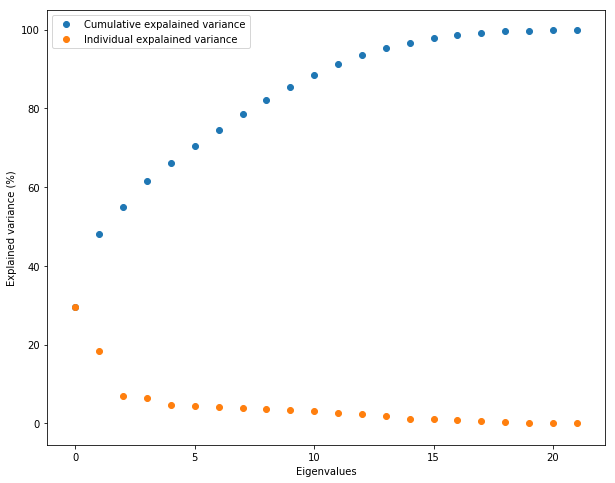

In [54]:
# Calculating eigenvectors and eigenvalues of covariance matirx
mean_vec = np.mean(standard_data, axis=0)
cov_mat = np.cov(standard_data.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of explained variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp)

#Plotting explained variance of the eigen values
plt.figure(figsize=(10,8))
cumulative = plt.scatter(range(0,22), cum_var_exp, label = "Cumulative expalained variance")
single = plt.scatter(range(0,22), var_exp, label = "Individual expalained variance")
plt.legend(handles = [cumulative, single])
plt.xlabel("Eigenvalues")
plt.ylabel("Explained variance (%)")
plt.show()


## How does the data look when looked through T-SNE clustering algorithm?



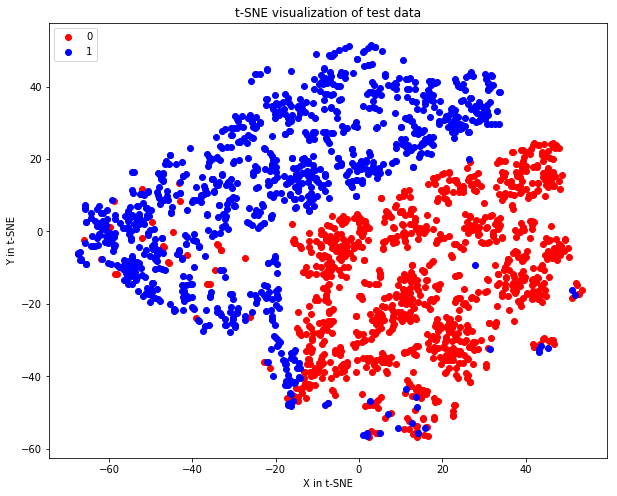

In [21]:
tsne_data = data.iloc[:,0:25]
tsne_data.rename(columns = {'default.payment.next.month':'default'}, inplace=True)

#split the data into defaulters and those who didn't 
not_default = tsne_data[tsne_data.Default == 0].sample(1000)
default = tsne_data[tsne_data.Default == 1].sample(1000)
both = pd.concat([not_default, default], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
both_std = standard_scaler.fit_transform(both)

#Create vector for target values
y = both.iloc[:,-1].values

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(both_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure(figsize = (10,8))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

There seems to be a quite good division between the classes in TSNE clustering. However, there are also some points that are clearly in the wrong cluster which could indicate that some defaults might be impossible to predict based on the data we have. However, this is just 2 dimensions in order to make this plottable so this might not be the case in higher dimensions.

## Discussion

* It seems that it is possible to create a rather accurate model capable of achieving +80% accuracy in predicting default with just a couple of lines of code. The exact mechanism how even the simple algorithms achieve such hign results is not yet clear. Further analysis is needed to determine what are the revealing traits and underlying mechanisms.


* Other approaches like support vector machines and un- or semi-supervised clustering algoritms could be investigated, but neural networks are probably the way to go. Still, T-SNE clustering gave also pretty promising results that could be investigated further.  


* Geo data and employer information were not utilized in this analysis since they are difficult to handle at their current form. For example combining the geo data with dataset of average household income of customer's zip code could provide additional information on the customer. However, the benefit is questionable since this probably is mostly included in the balance limit of the customer, which is the best indicator for the customers current wealth. We also have the name of the customer's employer which could be used similarily to further assess the financial future of the customer since the future of the company and the employee are tightly connected. 


* Further down the project the goal was to develop a plan that could help prevent defaults. Currently we are just focusing on just will the customer default or not. In the future the developent that leads to default or, vice versa, returns the customer to the path of not defaulting should also be investigated. This could be done by, for example, comparing different customers who have a similar credit card history but other ends up defaulting and other doesn't. This would help us to better understand the process of preventing default based on the data. 

## Questions

1. The payment statuses
    * What are the statuses labeled as -2?
    * How can a customer have -1 one month and 2 the month after that?
    * The true mening of 0? Is it good as in "no problems" or bad as in "we don't know".


2. How does default work?
    * Is there a certain timeframe after september that is considered in defaulting?
    * What makes one default? Too many months backlog on payments? Personal bankruptcy?


3. Customer ID 7?
    * It seems that he went over his balance limit, how is that possible? 